In [1]:
import pandas as pd
df = pd.read_csv('ipl_2024_scorecards_points.csv')

In [ ]:
# Average Points per Role

# Group by 'Role' and calculate the average 'Points' for each role
role_avg_points = df.groupby('Role')['Points'].mean()

# Print the result
role_avg_points_df = role_avg_points.reset_index()
print(role_avg_points_df)

         Role     Points
0  Allrounder  36.875566
1      Batter  35.815857
2      Bowler  32.714524
3   WK-Batter  39.573034


In [ ]:
# Top 11 players in each match by Role

# Group by 'Match Number' and sort each match by 'Points' in descending order
top_11_by_match = df.sort_values(by=['Match Number', 'Points'], ascending=[True, False])

# For each match, select the top 11 players
top_11_by_match = top_11_by_match.groupby('Match Number').head(11)

# Count the occurrences of each role in the top 11 players for each match
role_counts = top_11_by_match.groupby(['Match Number', 'Role']).size().unstack(fill_value=0)

# Print the result: the role counts in the top 11 for each match
print(role_counts)

role_avg = role_counts.mean()
print(role_avg)

Role          Allrounder  Batter  Bowler  WK-Batter
Match Number                                       
0                      5       2       1          3
1                      2       1       5          3
2                      3       3       3          2
3                      3       1       3          4
4                      1       5       5          0
...                  ...     ...     ...        ...
68                     2       3       3          3
70                     3       2       4          2
71                     4       5       2          0
72                     2       3       4          2
73                     4       1       5          1

[71 rows x 4 columns]
Role
Allrounder    3.084507
Batter        2.478873
Bowler        3.704225
WK-Batter     1.732394
dtype: float64


In [ ]:
#Top 50 players and their total points in the tournament

# Group by 'Name' to sum total points
total_points = df.groupby('Name')['Points'].sum()

# Get the role for each player (assuming role is consistent per player)
player_roles = df.groupby('Name')['Role'].first()

# Combine points and roles into a single DataFrame
player_stats = pd.DataFrame({'Role': player_roles, 'Total Points': total_points})

# Sort by total points in descending order and select the top 30 players
top_50_players = player_stats.sort_values(by='Total Points', ascending=False).head(50)

# Print the top 30 players with their roles and total points
print(top_50_players)

role_counts = top_50_players['Role'].value_counts()
print(role_counts)

                           Role  Total Points
Name                                         
Sunil Narine         Allrounder        1265.0
Virat Kohli              Batter        1089.0
Andre Russell        Allrounder         819.0
KL Rahul              WK-Batter         817.0
Riyan Parag          Allrounder         815.0
Abhishek Sharma      Allrounder         810.0
Sam Curran           Allrounder         800.0
Ruturaj Gaikwad          Batter         797.0
Travis Head              Batter         783.0
Nicholas Pooran       WK-Batter         774.0
Sanju Samson          WK-Batter         771.0
Rishabh Pant          WK-Batter         756.0
Heinrich Klaasen      WK-Batter         752.0
Axar Patel           Allrounder         739.0
Philip Salt           WK-Batter         739.0
Harshal Patel            Bowler         734.0
Pat Cummins              Bowler         711.0
Sai Sudharsan            Batter         691.0
Faf du Plessis           Batter         669.0
Tristan Stubbs        WK-Batter   

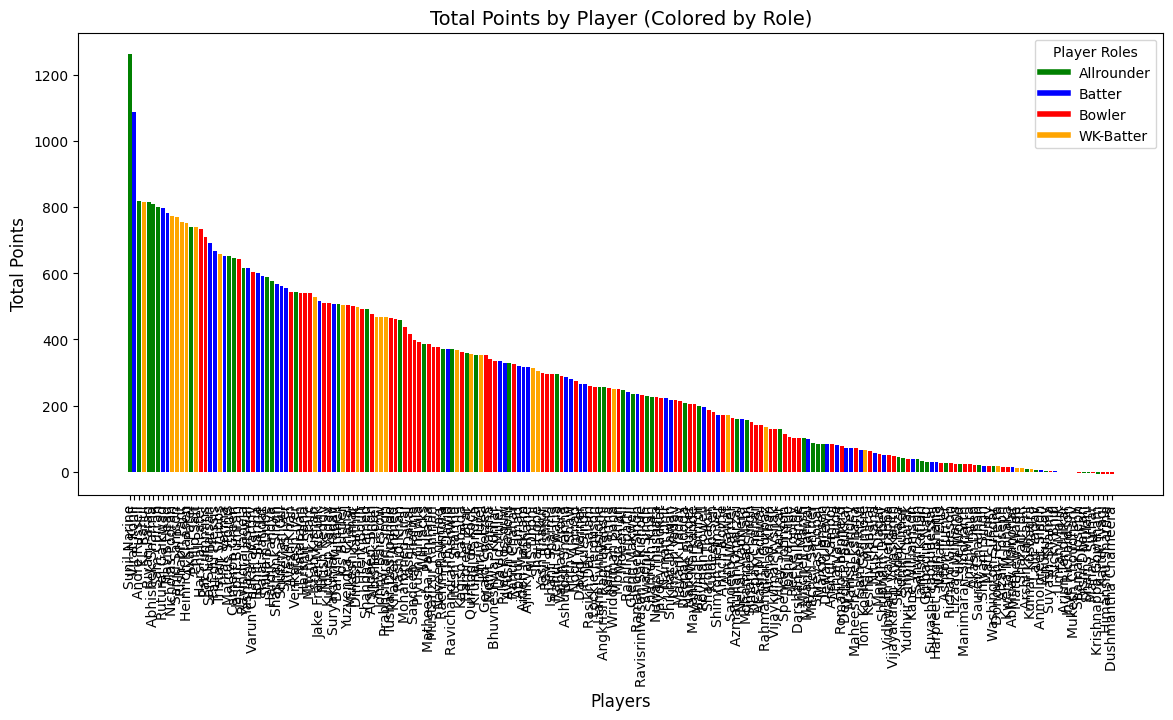

In [ ]:
#Graph all players and their total points, color coded by role


import matplotlib.pyplot as plt

# Group by 'Name' to sum total points
total_points = df.groupby('Name')['Points'].sum()

# Get the role for each player (assuming role is consistent per player)
player_roles = df.groupby('Name')['Role'].first()

# Combine points and roles into a single DataFrame
player_stats = pd.DataFrame({'Role': player_roles, 'Total Points': total_points})

# Sort players by total points in descending order
player_stats = player_stats.sort_values(by='Total Points', ascending=False)

# Define colors for each role
role_colors = {
    'Allrounder': 'green',
    'Batter': 'blue',
    'Bowler': 'red',
    'WK-Batter': 'orange'
}

# Map colors to players based on their roles
colors = player_stats['Role'].map(role_colors)

# Plot the bar chart
plt.figure(figsize=(14, 6))
plt.bar(player_stats.index, player_stats['Total Points'], color=colors)

# Labels and title
plt.xlabel('Players', fontsize=12)
plt.ylabel('Total Points', fontsize=12)
plt.title('Total Points by Player (Colored by Role)', fontsize=14)
plt.xticks(rotation=90, fontsize=10)  # Rotate player names for readability

# Create legend manually
legend_labels = [plt.Line2D([0], [0], color=role_colors[role], lw=4, label=role) for role in role_colors]
plt.legend(handles=legend_labels, title="Player Roles")

# Show the graph
plt.show()
